# This is a corporate stress dataset
we are goin to use python for the view

## Understand the Dataset
and upload

In [2]:
import pandas as pd

In [12]:
file_path = r'C:\Users\Adriana Arrellano\Desktop\Datasets\corporate_stress_dataset.csv'
data = pd.read_csv(file_path)

In [18]:
print(data.head()) #show the headline
print(data.info()) #show info about the data type

   ID  Age      Gender Marital_Status   Job_Role  Experience_Years  \
0   1   56  Non-Binary        Widowed  Developer                 5   
1   2   46      Female         Single    Analyst                20   
2   3   32      Female         Single  Developer                10   
3   4   60      Female       Divorced    Analyst                26   
4   5   25        Male        Married      Sales                29   

   Monthly_Salary_INR  Working_Hours_per_Week  Commute_Time_Hours  \
0           102703.08                      44                1.72   
1           165583.91                      54                0.62   
2            38005.39                      81                1.22   
3            51127.36                      79                2.03   
4           174597.45                      63                1.45   

   Remote_Work  ...  Work_Life_Balance Family_Support_Level Job_Satisfaction  \
0         True  ...                  9                    2                5   
1   

In [14]:
print(data.isnull().sum()) #Count the missing values per column

ID                                      0
Age                                     0
Gender                                  0
Marital_Status                          0
Job_Role                                0
Experience_Years                        0
Monthly_Salary_INR                      0
Working_Hours_per_Week                  0
Commute_Time_Hours                      0
Remote_Work                             0
Stress_Level                            0
Health_Issues                       12541
Company_Size                            0
Department                              0
Sleep_Hours                             0
Physical_Activity_Hours_per_Week        0
Mental_Health_Leave_Taken               0
Manager_Support_Level                   0
Work_Pressure_Level                     0
Annual_Leaves_Taken                     0
Work_Life_Balance                       0
Family_Support_Level                    0
Job_Satisfaction                        0
Performance_Rating                

**I found that healt_issues has 12541 null caracters... so we net to find out how many rows does the data set has**

In [16]:
# to check the number of rows
num_rows =data.shape[0]
print(f"the dataset contains {num_rows} rows.")

the dataset contains 50000 rows.


**We see that we have no nulls columns in healt issues, so que cannot remove the column**

How much data is missing in this column? and 
why this data be missing?

In [23]:
print(data['Health_Issues'].isnull().mean() * 100) #percentage of null values

0.0


we have 1/4 of the data ass null, so we cannot remove it.

To solve this we will change the data value to "no known issue"

In [22]:
data['Health_Issues'] = data['Health_Issues'].fillna('No known issues')
#Now if we check for the percentages of null data, we will obtain 0%

In [24]:
print(data.isnull().sum()) #another way to search null values

ID                                  0
Age                                 0
Gender                              0
Marital_Status                      0
Job_Role                            0
Experience_Years                    0
Monthly_Salary_INR                  0
Working_Hours_per_Week              0
Commute_Time_Hours                  0
Remote_Work                         0
Stress_Level                        0
Health_Issues                       0
Company_Size                        0
Department                          0
Sleep_Hours                         0
Physical_Activity_Hours_per_Week    0
Mental_Health_Leave_Taken           0
Manager_Support_Level               0
Work_Pressure_Level                 0
Annual_Leaves_Taken                 0
Work_Life_Balance                   0
Family_Support_Level                0
Job_Satisfaction                    0
Performance_Rating                  0
Team_Size                           0
Training_Opportunities              0
Gender_Bias_

## Define Objectives

what do we want to analyze about corporate stress?
- Descriptive Statistics: Key metrics (averages, distributions)
- Group of comparison: look at stress levels by job role, gender, or seniority
- Correlations
- Trends over time
- Actionable insights

### General Trends in Health Issues

In [28]:
print(data['Health_Issues'].value_counts())
print(data['Health_Issues'].value_counts(normalize=True) * 100)#this give us the %

Health_Issues
No known issues    12541
Mental             12534
Both               12518
Physical           12407
Name: count, dtype: int64
Health_Issues
No known issues    25.082
Mental             25.068
Both               25.036
Physical           24.814
Name: proportion, dtype: float64


In [29]:
#For visualization
import matplotlib.pyplot as plt

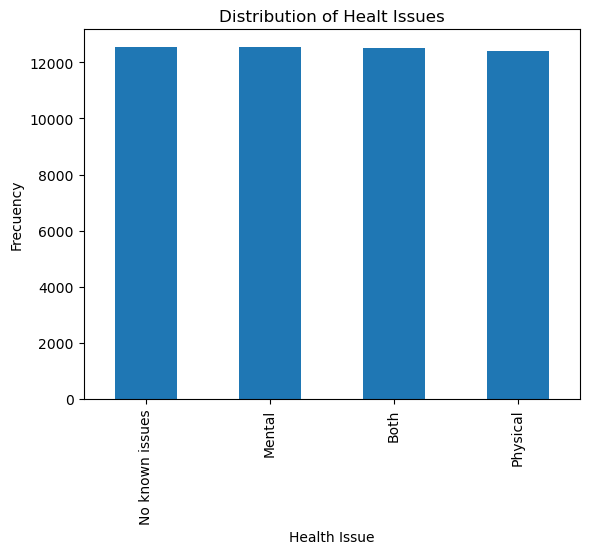

In [32]:
data['Health_Issues'].value_counts().plot(kind='bar')#value_counts counts the occurrences of...
#...each unique calue in the column, .plot is a pandas metod and kind=bar specifies that we want a barchar
plt.title('Distribution of Healt Issues')
plt.xlabel('Health Issue')
plt.ylabel('Frecuency')
plt.show()

### Metrics Comparations by groups

In [34]:
#lets compare stress level by gender
print(data.groupby('Gender')['Stress_Level'].mean())

Gender
Female        4.987954
Male          5.028771
Non-Binary    4.997275
Name: Stress_Level, dtype: float64


Lets explain the *"print(data.groupby('Gender')['Stress_Level'].mean())"*

data.groupby('Gender'): this groups the dataset by the values in the column gender (female, male, non-binary)

Stress_Level:this part focus the operation on just one column, only in stress level.

.mean(): average of stres level values for each group of gender


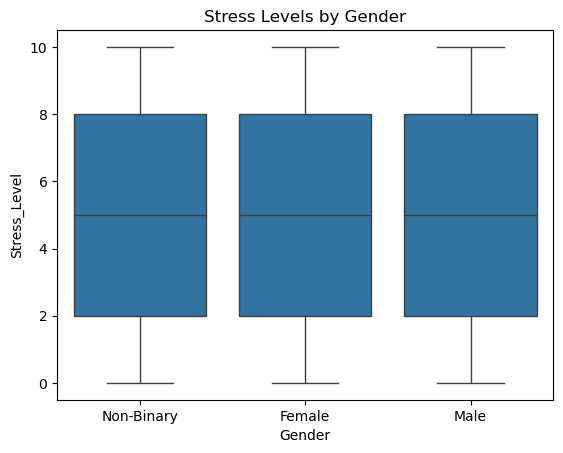

In [36]:
#Visualiation comparisons
import seaborn as sns

sns.boxplot(x='Gender', y='Stress_Level', data=data)
plt.title('Stress Levels by Gender')
plt.show()

#### Box plots
Key Components of a Boxplot
Box:

The central part of the plot.
Represents the interquartile range (IQR), which is the middle 50% of the data:
Bottom of the box: 25th percentile (Q1, the first quartile).
Top of the box: 75th percentile (Q3, the third quartile).
Median:

A line inside the box.
Represents the 50th percentile (Q2), which is the midpoint of the data.
Whiskers:

Lines extending from the box.
They represent the range of the data, excluding outliers.
Typically, whiskers extend to:
Lower whisker: 
𝑄
1
−
1.5
⋅
IQR
Lower whisker: Q1−1.5⋅IQR
Upper whisker: 
𝑄
3
+
1.5
⋅
IQR
Upper whisker: Q3+1.5⋅IQR
Data points beyond this range are considered outliers.
Outliers:

Individual points plotted beyond the whiskers.
These represent data values that are unusually high or low compared to the rest.
Axes:

X-axis: Represents categories (e.g., "Gender" in your case: Male, Female).
Y-axis: Represents the variable being measured (e.g., "Stress Levels").
What Information Does a Boxplot Provide?
Center:

The median (inside the box) gives a measure of the central tendency.
Spread:

The size of the box (IQR) shows data variability:
A smaller box means the middle 50% of the data is tightly clustered.
A larger box indicates more spread.
Outliers:

Individual points outside the whiskers highlight extreme values.
Symmetry/Skewness:

A symmetrical box (equal spacing around the median) indicates a symmetric distribution.
If the median is closer to one end, it shows skewness.
Comparison Across Categories:

When grouped by categories (e.g., Male vs. Female), boxplots show differences in central tendency, spread, and outliers.

## Correlations Between Metrics

In [40]:
numeric_data = data.select_dtypes(include=['number']) #this selects only the columns that has numerical values
print(numeric_data.corr())

                                        ID       Age  Experience_Years  \
ID                                1.000000  0.002167          0.000046   
Age                               0.002167  1.000000          0.003991   
Experience_Years                  0.000046  0.003991          1.000000   
Monthly_Salary_INR               -0.005320 -0.005311         -0.006629   
Working_Hours_per_Week           -0.006220 -0.005989         -0.006861   
Commute_Time_Hours               -0.003895  0.002419          0.002269   
Stress_Level                      0.001127  0.001107         -0.003976   
Sleep_Hours                       0.006601  0.003441          0.007240   
Physical_Activity_Hours_per_Week  0.004252  0.001706         -0.007258   
Manager_Support_Level             0.003603 -0.002724         -0.001685   
Work_Pressure_Level              -0.001599 -0.006942         -0.000614   
Annual_Leaves_Taken               0.005862  0.000490         -0.002361   
Work_Life_Balance                -0.00

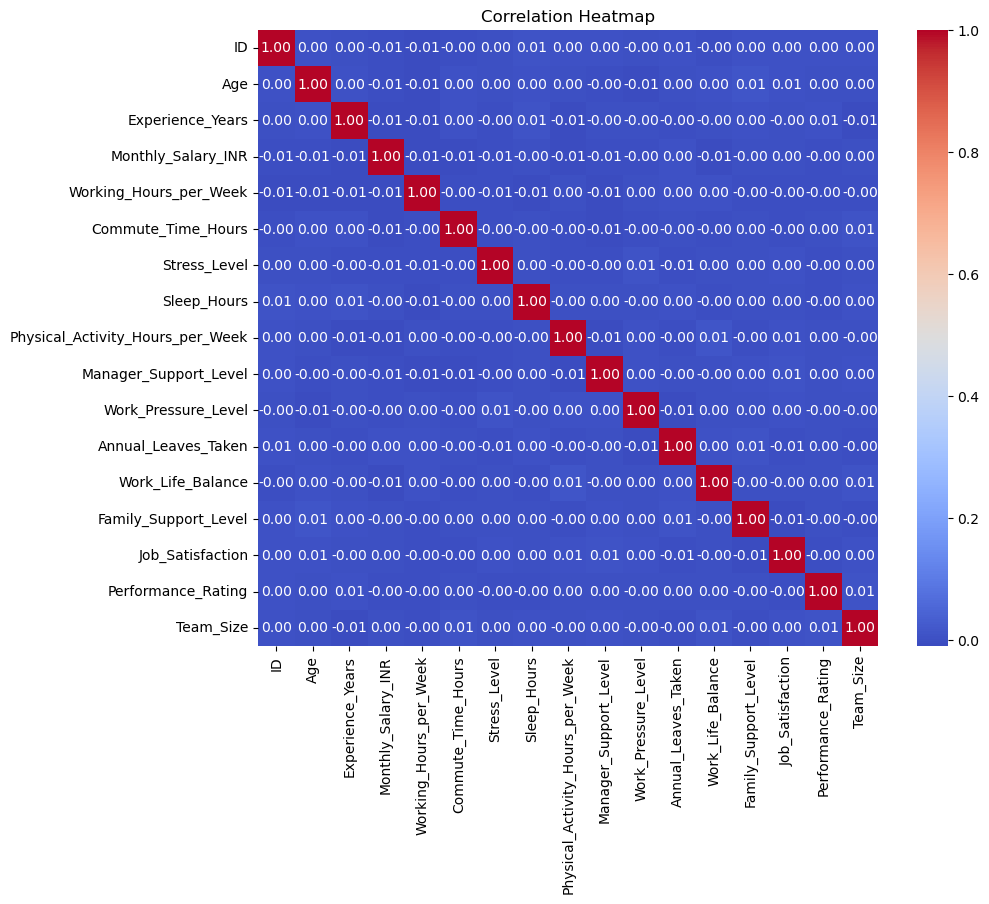

In [46]:
#let´s visualie correlations

plt.figure(figsize=(10,8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

**We don't see correlation between numerical data**
Maybe I can plot only 2 variables to see if there is any correlation

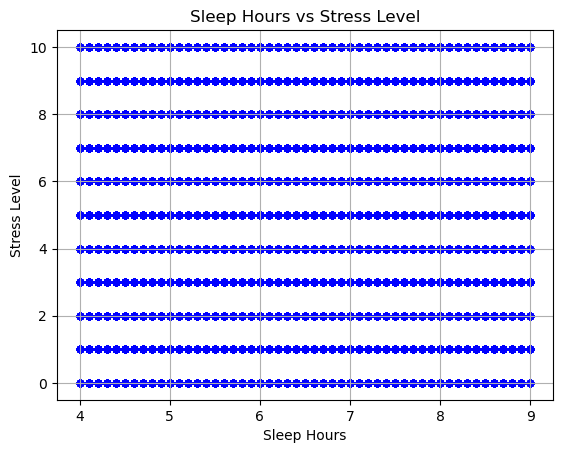

In [75]:
data.plot(kind='scatter', x='Sleep_Hours', y='Stress_Level', alpha=0.5, color='blue')
plt.title('Sleep Hours vs Stress Level')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()


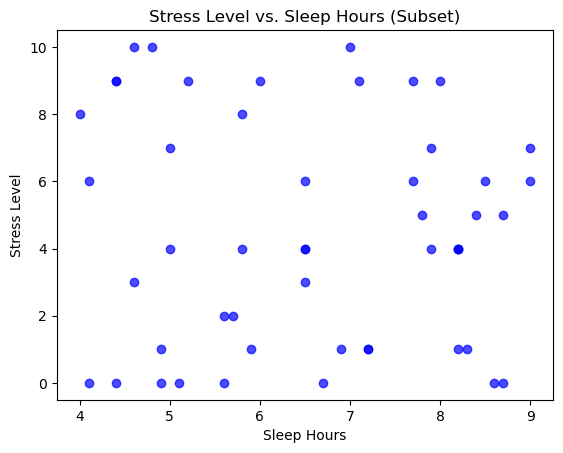

In [88]:
subset_data = data.head(50)# data[(data['Stress_Level'] > 5) & (data['Sleep_Hours'] < 7)]  # High stress, low sleep

plt.scatter(subset_data['Sleep_Hours'], subset_data['Stress_Level'], alpha=0.7, c='blue')
plt.title('Stress Level vs. Sleep Hours (Subset)')
plt.xlabel('Sleep Hours')
plt.ylabel('Stress Level')
plt.show()